# Working with scverse objects in backed mode

In this tutorial we show how to work with scverse data objects without loading the full datasets in memory. AnnData and MuData objects are saved to disk in HDF5 stores 

In [1]:
import anndata 
import mudata
import scanpy as sc
import muon as mu

# for datasets
import mudatasets
# import scvi

In [2]:
# Convenience method for computing the size of objects
def print_size_in_MB(x):
    print('{:.3} MB'.format(x.__sizeof__()/1e6))

- This is a "read-only" version of the data
- Useful for exploratory data analysis 
- Inspecting the elements of an object before subsetting


## Working with backed AnnData objects

Save anndata object in `.h5ad` format

In [9]:
adata = sc.datasets.pbmc3k_processed()
adata = adata.raw.to_adata() # Store raw counts in adata.X
adata.write_h5ad('./data/pbmc3k_processed_raw.h5ad')

In [10]:
print_size_in_MB(adata)

21.2 MB


Read in backed mode

In [11]:
adata = sc.read_h5ad('./data/pbmc3k_processed_raw.h5ad', backed=True)

In [12]:
print_size_in_MB(adata)

3.28 MB


You can check if an anndata object is loaded in backed mode using the `.isbacked` flag

In [6]:
adata.isbacked

True

In [7]:
adata.filename

PosixPath('data/pbmc3k_processed.h5ad')

### Exploratory data analysis

Plotting

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


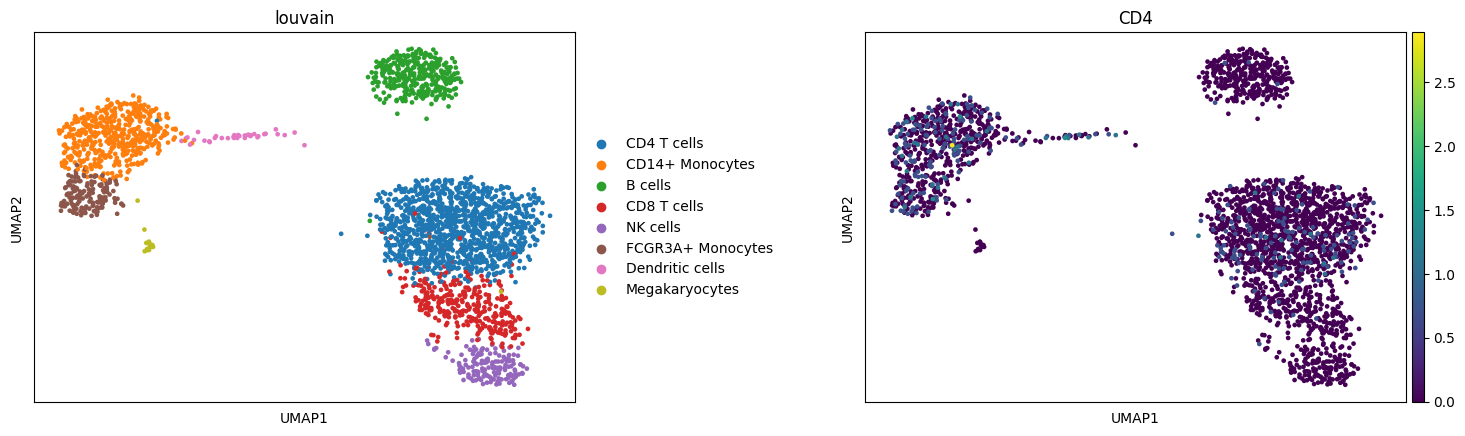

In [13]:
sc.pl.umap(adata, color=['louvain', 'CD4'], wspace=0.4)

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


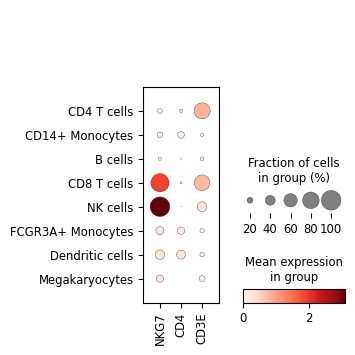

In [14]:
sc.pl.dotplot(adata, var_names=['NKG7', 'CD4', 'CD3E'], groupby='louvain')

Modify `.obs`, `.var`

In [15]:
adata.obs

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


In [16]:
sc.tl.leiden(adata, resolution=0.5, key_added='leiden_res0.5')

In [17]:
adata.obs

,n_genes,percent_mito,n_counts,louvain,leiden_res0.5
index,,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells,0
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells,3
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells,0
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes,1
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells,2
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes,1
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells,3
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells,3


/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


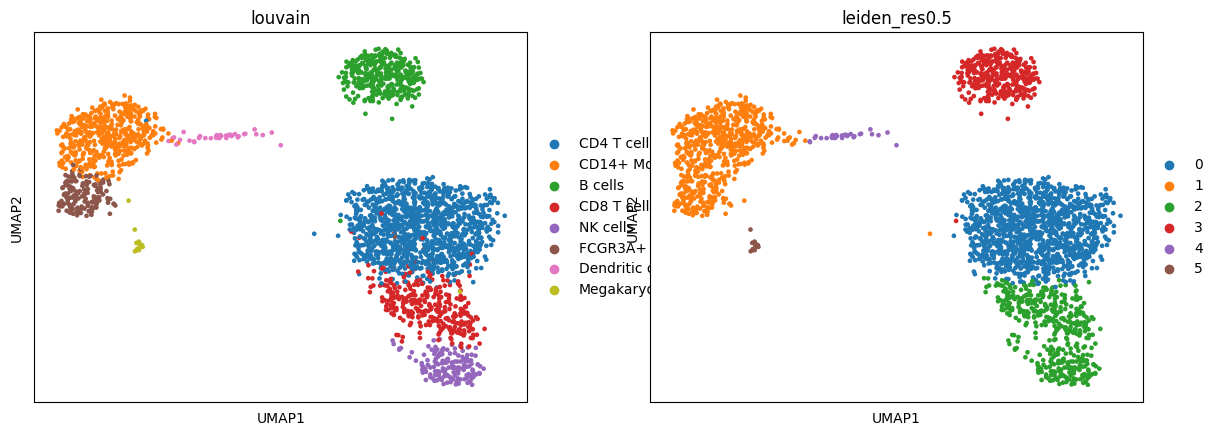

In [11]:
sc.pl.umap(adata, color=['louvain','leiden_res0.5'])

Find nearest neighbors (stores matrix in `.obsp`)

In [18]:
sc.pp.neighbors(adata, n_neighbors=20)

Compute nearest neighbor embeddings

In [19]:
sc.tl.umap(adata)

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


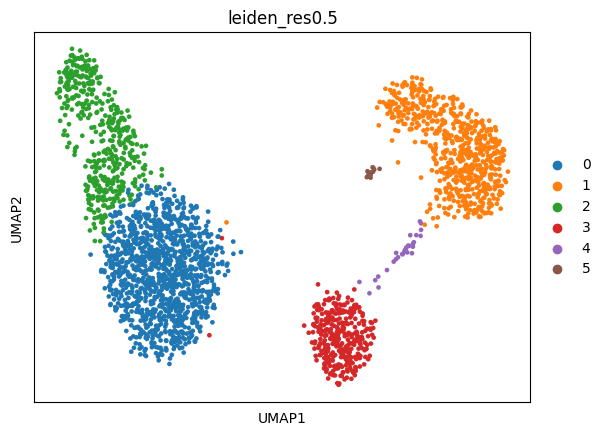

In [20]:
sc.pl.umap(adata, color='leiden_res0.5')

### Extracting a subset of AnnData

In [60]:
adata_subset = adata[adata.obs['louvain'] == 'CD4 T cells'].to_memory()

In [61]:
adata_subset

AnnData object with n_obs × n_vars = 1144 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden_res0.5'
    var: 'n_cells'
    uns: 'draw_graph', 'leiden', 'leiden_res0.5_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [62]:
adata_subset.isbacked

False

If we want to keep working in backed mode with this data subset, we can copy it specifying a new `.h5ad` file on disk where this should be saved

In [57]:
adata_subset = adata[adata.obs['louvain'] == 'CD4 T cells'].copy(filename='./data/pbmc3k_processed_CD4Tcells.h5ad')

In [58]:
adata_subset

AnnData object with n_obs × n_vars = 1144 × 13714 backed at 'data/pbmc3k_processed_CD4Tcells.h5ad'
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden_res0.5'
    var: 'n_cells'
    uns: 'draw_graph', 'leiden', 'leiden_res0.5_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [59]:
adata_subset.isbacked

True

### Things you can't do with AnnData in backed mode

Backed mode loads gene expression matrices in "read-only" mode, so functions that attempt to modify `adata.X` will throw errors. 

For example, normalizing:

In [21]:
sc.pp.normalize_total(adata)

AttributeError: 'SparseDataset' object has no attribute 'sum'

but the gene expression matrix can be accessed directly using numerical indices.

In [27]:
adata.X[:,0:adata.n_vars]

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

Of note, in the current version of `anndata` the matrices in `adata.layers` are __not__ backed.

### Save changes made to backed AnnData

We can save the changes we've made to the backed anndata by writing back to the linked h5ad file. The path to the file on disk is stored in `adata.filename`

In [46]:
adata.filename

PosixPath('data/pbmc3k_processed_raw.h5ad')

In [28]:
adata.write_h5ad()

If we re-load this object from file, we will find all the updated information in the `obs` slot

In [35]:
adata = sc.read_h5ad('./data/pbmc3k_processed_raw.h5ad', backed=True) 

In [36]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714 backed at 'data/pbmc3k_processed_raw.h5ad'
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden_res0.5'
    var: 'n_cells'
    uns: 'draw_graph', 'leiden', 'leiden_res0.5_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

We can also save to a different file

In [47]:
adata.write_h5ad('./data/pbmc3k_processed_newclustering.h5ad')

## Subsetting a backed AnnData object

In [60]:
adata_subset = adata[adata.obs['louvain'] == 'CD4 T cells'].to_memory()

In [61]:
adata_subset

AnnData object with n_obs × n_vars = 1144 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden_res0.5'
    var: 'n_cells'
    uns: 'draw_graph', 'leiden', 'leiden_res0.5_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [62]:
adata_subset.isbacked

False

If we want to keep working in backed mode with this data subset, we can copy it specifying a new `.h5ad` file on disk where this should be saved

In [57]:
adata_subset = adata[adata.obs['louvain'] == 'CD4 T cells'].copy(filename='./data/pbmc3k_processed_CD4Tcells.h5ad')

In [58]:
adata_subset

AnnData object with n_obs × n_vars = 1144 × 13714 backed at 'data/pbmc3k_processed_CD4Tcells.h5ad'
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden_res0.5'
    var: 'n_cells'
    uns: 'draw_graph', 'leiden', 'leiden_res0.5_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [59]:
adata_subset.isbacked

True

## Working with backed MuData objects

Working with data on disk is particularly useful when working of data modalities different from gene expression, where the number of measured features is typically larger. For example, in data from scATAC-seq experiments accessibility is measured hundreds of thousands of genomic regions. 

For this application, also MuData objects support working in backed mode.


In [3]:
# Download mudata object and save in h5mu format
mdata = mudatasets.load('pbmc10k_multiome')
mdata['rna'].var_names_make_unique()
mdata.write_h5mu('./data/pbmc10k_multiome.h5mu')

■ File filtered_feature_bc_matrix.h5 from pbmc10k_multiome has been found at /home/jovyan/mudatasets/pbmc10k_multiome/filtered_feature_bc_matrix.h5
■ Checksum is validated (md5) for filtered_feature_bc_matrix.h5
■ Loading filtered_feature_bc_matrix.h5...


/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudatasets/core.py:203: UserWarning: Dataset is in the 10X .h5 format and can't be loaded as backed.
  warn("Dataset is in the 10X .h5 format and can't be loaded as backed.")
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from /home/jovyan/mudatasets/pbmc10k_multiome/filtered_feature_bc_matrix.h5


/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:446: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future version, `df.iloc[:, i] = 

We can see that the slot storing the scATAC accessibility matrix is quite large when loaded in memory

In [4]:
print_size_in_MB(mdata['atac'])

7.16e+02 MB


/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/anndata/_core/anndata.py:549: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return X.__sizeof__()


Let's load the `.h5mu` object in backed mode using the `read_h5mu` function from the muon package.

In [5]:
mdata = mu.read_h5mu('./data/pbmc10k_multiome.h5mu', backed=True)

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [6]:
mdata

MuData object with n_obs × n_vars = 11909 × 144978 backed at 'data/pbmc10k_multiome.h5mu'
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

You can see that here the feature x cell matrices for both modalities are on-disk

In [7]:
print_size_in_MB(mdata['atac'])

31.6 MB


/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/anndata/_core/anndata.py:549: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return X.__sizeof__()


### Working with only one modality in memory

If we are analysing a multi-modal dataset, we might need to handle and process only one modality at a time. In this case we can keep the other modality on disk to reduce memory usage. For example, we can load the RNA modality only, to run clustering. 

In [8]:
mdata.mod['rna'] = mdata.mod['rna'].to_memory()

In [9]:
mdata['rna'].isbacked

False

In [10]:
mdata['atac'].isbacked

True

Now we can run preprocessing of the expression data (following the steps from the [muon tutorial](https://muon-tutorials.readthedocs.io/en/latest/single-cell-rna-atac/pbmc10k/1-Gene-Expression-Processing.html#RNA))

In [11]:
rna = mdata.mod['rna']

## Normalization
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

## HVG selection
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

In [12]:
## Dim reduction and embeddings
sc.tl.pca(rna, svd_solver='arpack')
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=20)
sc.tl.umap(rna)
sc.tl.leiden(rna, resolution=1.0)

In [8]:
# sc.pl.umap(rna, color='leiden', legend_loc='on data')

In [50]:
# mdata.mod['rna'] = rna

In [13]:
mdata['rna'].X.data

array([0.7854152, 0.7854152, 0.7854152, ..., 3.043465 , 1.1693056,
       4.180108 ], dtype=float32)

Now all the changes are saved in the MuData object.

We can save changes to the h5mu file on disk, without needing to load the ATAC modality dataset

In [14]:
## Save log-normalized files in layers 
# (write_h5mu doesn't rewrite .X if the file is in backed mode) 
mdata['rna'].layers['lognorm_counts'] = mdata['rna'].X.copy()

In [15]:
mdata.write_h5mu()

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


Now we can reload the updated object to have both modalities on disk

In [3]:
mdata = mu.read_h5mu('./data/pbmc10k_multiome.h5mu', backed=True)

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [4]:
mdata

MuData object with n_obs × n_vars = 11909 × 144978 backed at 'data/pbmc10k_multiome.h5mu'
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      obs:	'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'lognorm_counts'
      obsp:	'connectivities', 'distances'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

In [5]:
mdata['atac'].isbacked and mdata['rna'].isbacked

True

### Extracting a MuData subset

Similarly to the AnnData case, we can use the backed mode to identify a subset of data that we are interested in, and save it as a smaller object to load into memory. 

For example, we could subset the PBMC dataset to include only the T and NK cells (clusters expressing CD2)

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


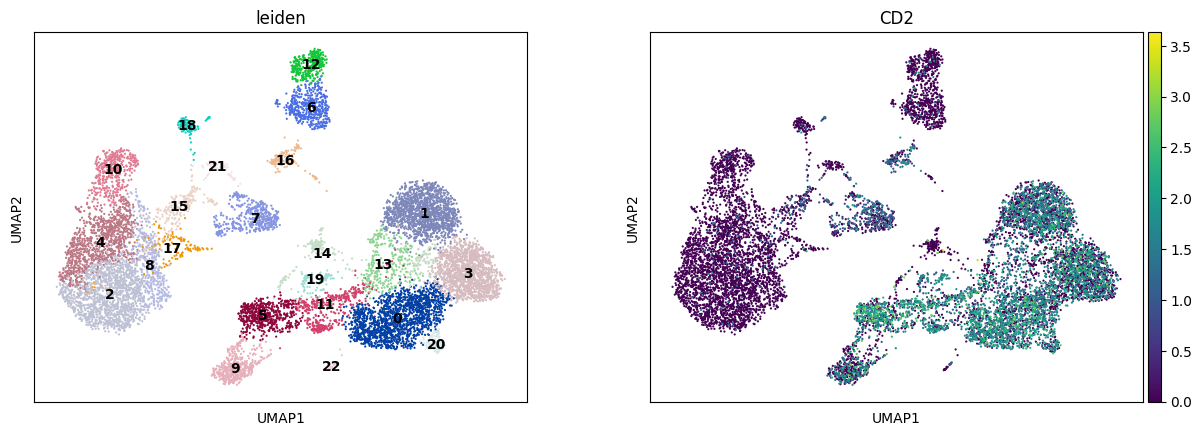

In [6]:
sc.pl.umap(mdata['rna'], color=['leiden', 'CD2'], layer='lognorm_counts', legend_loc = 'on data')

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


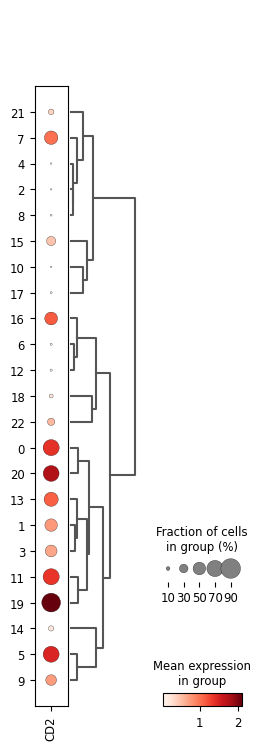

In [7]:
sc.pl.dotplot(mdata['rna'], var_names=['CD2'], groupby='leiden', dendrogram=True)

In [8]:
nkt_cell_clusters = ['19', '20', '13', '11', '9','14', '19', '5', '0', '1', '3']
mdata[mdata.obs['rna:leiden'].isin(nkt_cell_clusters)]

View of MuData object with n_obs × n_vars = 6643 × 144978 backed at 'data/pbmc10k_multiome.h5mu'
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	6643 x 36601
      obs:	'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_colors', 'dendrogram_leiden'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'lognorm_counts'
      obsp:	'connectivities', 'distances'
    atac:	6643 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

In [9]:
mdata_nkt = mdata[mdata.obs['rna:leiden'].isin(nkt_cell_clusters)].copy(filename='./data/pbmc10k_multiome.NKTcells.h5mu')

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

In [11]:
mdata_nkt

MuData object with n_obs × n_vars = 6643 × 144978 backed at 'data/pbmc10k_multiome.NKTcells.h5mu'
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	6643 x 36601
      obs:	'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'lognorm_counts'
      obsp:	'connectivities', 'distances'
    atac:	6643 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

We can load this object in memory by reading from file

In [12]:
mdata_nkt = mu.read_h5mu('./data/pbmc10k_multiome.NKTcells.h5mu')

/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/scverse-tutorial/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [13]:
mdata_nkt

MuData object with n_obs × n_vars = 6643 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	6643 x 36601
      obs:	'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'lognorm_counts'
      obsp:	'connectivities', 'distances'
    atac:	6643 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

In [14]:
mdata_nkt.isbacked

False

### Things you can't do with MuData in backed mode

The current MuData implementation doesn't support having a different number of obs between modalities in backed mode.     